<a href="https://colab.research.google.com/github/daigokk/txt2wordcloud/blob/main/txt2wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!wget https://raw.githubusercontent.com/daigokk/txt2wordcloud/main/txt2wordcloud.py

--2022-01-06 05:41:38--  https://raw.githubusercontent.com/daigokk/txt2wordcloud/main/txt2wordcloud.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8484 (8.3K) [text/plain]
Saving to: ‘txt2wordcloud.py’

txt2wordcloud.py    100%[===================>]   8.29K  --.-KB/s    in 0s      

2022-01-06 05:41:38 (81.4 MB/s) - ‘txt2wordcloud.py’ saved [8484/8484]



In [9]:
def install_libraries():
    !apt-get -y install fonts-ipafont-gothic
    !echo `mecab-config --dicdir`"/fonts-japanese-mincho.ttf"
    !apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab
    !git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
    !echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n

    # シンボリックリンクによるエラー回避
    !ln -s /etc/mecabrc /usr/local/etc/mecabrc

    !pip install mojimoji
    !pip install mecab-python3
    !pip install japanize-matplotlib
    !pip install wordcloud
install_libraries()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (6,880 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155225 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

In [17]:
from txt2wordcloud import Txt2wordcloud

In [18]:
%%writefile target.txt
走れメロス太宰治メロスは激怒した。必ず、かの邪智暴虐の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。「王様は、人を殺します。」「なぜ殺すのだ。」「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」「たくさんの人を殺したのか。」「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」「おどろいた。国王は乱心か。」「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、というのです。このごろは、臣下の心をも、お疑いになり、少しく派手な暮しをしている者には、人質ひとりずつ差し出すことを命じて居ります。御命令を拒めば十字架にかけられて、殺されます。きょうは、六人殺されました。」聞いて、メロスは激怒した。「呆れた王だ。生かして置けぬ。」メロスは、単純な男であった。買い物を、背負ったままで、のそのそ王城にはいって行った。たちまち彼は、巡邏の警吏に捕縛された。調べられて、メロスの懐中からは短剣が出て来たので、騒ぎが大きくなってしまった。メロスは、王の前に引き出された。「この短刀で何をするつもりであったか。言え！」暴君ディオニスは静かに、けれども威厳を以て問いつめた。その王の顔は蒼白で、眉間の皺は、刻み込まれたように深かった。「市を暴君の手から救うのだ。」とメロスは悪びれずに答えた。「おまえがか？」王は、憫笑した。「仕方の無いやつじゃ。おまえには、わしの孤独がわからぬ。」「言うな！」とメロスは、いきり立って反駁した。「人の心を疑うのは、最も恥ずべき悪徳だ。王は、民の忠誠をさえ疑って居られる。」「疑うのが、正当の心構えなのだと、わしに教えてくれたのは、おまえたちだ。人の心は、あてにならない。人間は、もともと私慾のかたまりさ。信じては、ならぬ。」暴君は落着いて呟き、ほっと溜息をついた。「わしだって、平和を望んでいるのだが。」「なんの為の平和だ。自分の地位を守る為か。」こんどはメロスが嘲笑した。「罪の無い人を殺して、何が平和だ。」「だまれ、下賤の者。」王は、さっと顔を挙げて報いた。「口では、どんな清らかな事でも言える。わしには、人の腹綿の奥底が見え透いてならぬ。おまえだって、いまに、磔になってから、泣いて詫びたって聞かぬぞ。」「ああ、王は悧巧だ。自惚れているがよい。私は、ちゃんと死ぬる覚悟で居るのに。命乞いなど決してしない。ただ、――」と言いかけて、メロスは足もとに視線を落し瞬時ためらい、「ただ、私に情をかけたいつもりなら、処刑までに三日間の日限を与えて下さい。たった一人の妹に、亭主を持たせてやりたいのです。三日のうちに、私は村で結婚式を挙げさせ、必ず、ここへ帰って来ます。」「ばかな。」と暴君は、嗄れた声で低く笑った。「とんでもない嘘を言うわい。逃がした小鳥が帰って来るというのか。」「そうです。帰って来るのです。」メロスは必死で言い張った。「私は約束を守ります。私を、三日間だけ許して下さい。妹が、私の帰りを待っているのだ。そんなに私を信じられないならば、よろしい、この市にセリヌンティウスという石工がいます。私の無二の友人だ。あれを、人質としてここに置いて行こう。私が逃げてしまって、三日目の日暮まで、ここに帰って来なかったら、あの友人を絞め殺して下さい。たのむ、そうして下さい。」それを聞いて王は、残虐な気持で、そっと北叟笑んだ。生意気なことを言うわい。どうせ帰って来ないにきまっている。この嘘つきに騙された振りして、放してやるのも面白い。そうして身代りの男を、三日目に殺してやるのも気味がいい。人は、これだから信じられぬと、わしは悲しい顔して、その身代りの男を磔刑に処してやるのだ。世の中の、正直者とかいう奴輩にうんと見せつけてやりたいものさ。「願いを、聞いた。その身代りを呼ぶがよい。三日目には日没までに帰って来い。おくれたら、その身代りを、きっと殺すぞ。ちょっとおくれて来るがいい。おまえの罪は、永遠にゆるしてやろうぞ。」「なに、何をおっしゃる。」「はは。いのちが大事だったら、おくれて来い。おまえの心は、わかっているぞ。」メロスは口惜しく、地団駄踏んだ。ものも言いたくなくなった。竹馬の友、セリヌンティウスは、深夜、王城に召された。暴君ディオニスの面前で、佳き友と佳き友は、二年ぶりで相逢うた。メロスは、友に一切の事情を語った。セリヌンティウスは無言で首肯き、メロスをひしと抱きしめた。友と友の間は、それでよかった。セリヌンティウスは、縄打たれた。メロスは、すぐに出発した。初夏、満天の星である。メロスはその夜、一睡もせず十里の路を急ぎに急いで、村へ到着したのは、翌る日の午前、陽は既に高く昇って、村人たちは野に出て仕事をはじめていた。メロスの十六の妹も、きょうは兄の代りに羊群の番をしていた。よろめいて歩いて来る兄の、疲労｜困憊の姿を見つけて驚いた。そうして、うるさく兄に質問を浴びせた。「なんでも無い。」メロスは無理に笑おうと努めた。「市に用事を残して来た。またすぐ市に行かなければならぬ。あす、おまえの結婚式を挙げる。早いほうがよかろう。」妹は頬をあからめた。「うれしいか。綺麗な衣裳も買って来た。さあ、これから行って、村の人たちに知らせて来い。結婚式は、あすだと。」メロスは、また、よろよろと歩き出し、家へ帰って神々の祭壇を飾り、祝宴の席を調え、間もなく床に倒れ伏し、呼吸もせぬくらいの深い眠りに落ちてしまった。眼が覚めたのは夜だった。メロスは起きてすぐ、花婿の家を訪れた。そうして、少し事情があるから、結婚式を明日にしてくれ、と頼んだ。婿の牧人は驚き、それはいけない、こちらには未だ何の仕度も出来ていない、葡萄の季節まで待ってくれ、と答えた。メロスは、待つことは出来ぬ、どうか明日にしてくれ給え、と更に押してたのんだ。婿の牧人も頑強であった。なかなか承諾してくれない。夜明けまで議論をつづけて、やっと、どうにか婿をなだめ、すかして、説き伏せた。結婚式は、真昼に行われた。新郎新婦の、神々への宣誓が済んだころ、黒雲が空を覆い、ぽつりぽつり雨が降り出し、やがて車軸を流すような大雨となった。祝宴に列席していた村人たちは、何か不吉なものを感じたが、それでも、めいめい気持を引きたて、狭い家の中で、むんむん蒸し暑いのも怺え、陽気に歌をうたい、手を拍った。メロスも、満面に喜色を湛え、しばらくは、王とのあの約束をさえ忘れていた。祝宴は、夜に入っていよいよ乱れ華やかになり、人々は、外の豪雨を全く気にしなくなった。メロスは、一生このままここにいたい、と思った。この佳い人たちと生涯暮して行きたいと願ったが、いまは、自分のからだで、自分のものでは無い。ままならぬ事である。メロスは、わが身に鞭打ち、ついに出発を決意した。あすの日没までには、まだ十分の時が在る。ちょっと一眠りして、それからすぐに出発しよう、と考えた。その頃には、雨も小降りになっていよう。少しでも永くこの家に愚図愚図とどまっていたかった。メロスほどの男にも、やはり未練の情というものは在る。今宵呆然、歓喜に酔っているらしい花嫁に近寄り、「おめでとう。私は疲れてしまったから、ちょっとご免こうむって眠りたい。眼が覚めたら、すぐに市に出かける。大切な用事があるのだ。私がいなくても、もうおまえには優しい亭主があるのだから、決して寂しい事は無い。おまえの兄の、一ばんきらいなものは、人を疑う事と、それから、嘘をつく事だ。おまえも、それは、知っているね。亭主との間に、どんな秘密でも作ってはならぬ。おまえに言いたいのは、それだけだ。おまえの兄は、たぶん偉い男なのだから、おまえもその誇りを持っていろ。」花嫁は、夢見心地で首肯いた。メロスは、それから花婿の肩をたたいて、「仕度の無いのはお互さまさ。私の家にも、宝といっては、妹と羊だけだ。他には、何も無い。全部あげよう。もう一つ、メロスの弟になったことを誇ってくれ。」花婿は揉み手して、てれていた。メロスは笑って村人たちにも会釈して、宴席から立ち去り、羊小屋にもぐり込んで、死んだように深く眠った。眼が覚めたのは翌る日の薄明の頃である。メロスは跳ね起き、南無三、寝過したか、いや、まだまだ大丈夫、これからすぐに出発すれば、約束の刻限までには十分間に合う。きょうは是非とも、あの王に、人の信実の存するところを見せてやろう。そうして笑って磔の台に上ってやる。メロスは、悠々と身仕度をはじめた。雨も、いくぶん小降りになっている様子である。身仕度は出来た。さて、メロスは、ぶるんと両腕を大きく振って、雨中、矢の如く走り出た。私は、今宵、殺される。殺される為に走るのだ。身代りの友を救う為に走るのだ。王の奸佞邪智を打ち破る為に走るのだ。走らなければならぬ。そうして、私は殺される。若い時から名誉を守れ。さらば、ふるさと。若いメロスは、つらかった。幾度か、立ちどまりそうになった。えい、えいと大声挙げて自身を叱りながら走った。村を出て、野を横切り、森をくぐり抜け、隣村に着いた頃には、雨も止み、日は高く昇って、そろそろ暑くなって来た。メロスは額の汗をこぶしで払い、ここまで来れば大丈夫、もはや故郷への未練は無い。妹たちは、きっと佳い夫婦になるだろう。私には、いま、なんの気がかりも無い筈だ。まっすぐに王城に行き着けば、それでよいのだ。そんなに急ぐ必要も無い。ゆっくり歩こう、と持ちまえの呑気さを取り返し、好きな小歌をいい声で歌い出した。ぶらぶら歩いて二里行き三里行き、そろそろ全里程の半ばに到達した頃、降って湧いた災難、メロスの足は、はたと、とまった。見よ、前方の川を。きのうの豪雨で山の水源地は氾濫し、濁流｜滔々と下流に集り、猛勢一挙に橋を破壊し、どうどうと響きをあげる激流が、木葉微塵に橋桁を跳ね飛ばしていた。彼は茫然と、立ちすくんだ。あちこちと眺めまわし、また、声を限りに呼びたててみたが、繋舟は残らず浪に浚われて影なく、渡守りの姿も見えない。流れはいよいよ、ふくれ上り、海のようになっている。メロスは川岸にうずくまり、男泣きに泣きながらゼウスに手を挙げて哀願した。「ああ、鎮めたまえ、荒れ狂う流れを！時は刻々に過ぎて行きます。太陽も既に真昼時です。あれが沈んでしまわぬうちに、王城に行き着くことが出来なかったら、あの佳い友達が、私のために死ぬのです。」濁流は、メロスの叫びをせせら笑う如く、ますます激しく躍り狂う。浪は浪を呑み、捲き、煽り立て、そうして時は、刻一刻と消えて行く。今はメロスも覚悟した。泳ぎ切るより他に無い。ああ、神々も照覧あれ！濁流にも負けぬ愛と誠の偉大な力を、いまこそ発揮して見せる。メロスは、ざんぶと流れに飛び込み、百匹の大蛇のようにのた打ち荒れ狂う浪を相手に、必死の闘争を開始した。満身の力を腕にこめて、押し寄せ渦巻き引きずる流れを、なんのこれしきと掻きわけ掻きわけ、めくらめっぽう獅子奮迅の人の子の姿には、神も哀れと思ったか、ついに憐愍を垂れてくれた。押し流されつつも、見事、対岸の樹木の幹に、すがりつく事が出来たのである。ありがたい。メロスは馬のように大きな胴震いを一つして、すぐにまた先きを急いだ。一刻といえども、むだには出来ない。陽は既に西に傾きかけている。ぜいぜい荒い呼吸をしながら峠をのぼり、のぼり切って、ほっとした時、突然、目の前に一隊の山賊が躍り出た。「待て。」「何をするのだ。私は陽の沈まぬうちに王城へ行かなければならぬ。放せ。」「どっこい放さぬ。持ちもの全部を置いて行け。」「私にはいのちの他には何も無い。その、たった一つの命も、これから王にくれてやるのだ。」「その、いのちが欲しいのだ。」「さては、王の命令で、ここで私を待ち伏せしていたのだな。」山賊たちは、ものも言わず一斉に棍棒を振り挙げた。メロスはひょいと、からだを折り曲げ、飛鳥の如く身近かの一人に襲いかかり、その棍棒を奪い取って、「気の毒だが正義のためだ！」と猛然一撃、たちまち、三人を殴り倒し、残る者のひるむ隙に、さっさと走って峠を下った。一気に峠を駈け降りたが、流石に疲労し、折から午後の灼熱の太陽がまともに、かっと照って来て、メロスは幾度となく眩暈を感じ、これではならぬ、と気を取り直しては、よろよろ二、三歩あるいて、ついに、がくりと膝を折った。立ち上る事が出来ぬのだ。天を仰いで、くやし泣きに泣き出した。ああ、あ、濁流を泳ぎ切り、山賊を三人も撃ち倒し韋駄天、ここまで突破して来たメロスよ。真の勇者、メロスよ。今、ここで、疲れ切って動けなくなるとは情無い。愛する友は、おまえを信じたばかりに、やがて殺されなければならぬ。おまえは、稀代の不信の人間、まさしく王の思う壺だぞ、と自分を叱ってみるのだが、全身｜萎えて、もはや芋虫ほどにも前進かなわぬ。路傍の草原にごろりと寝ころがった。身体疲労すれば、精神も共にやられる。もう、どうでもいいという、勇者に不似合いな不貞腐れた根性が、心の隅に巣喰った。私は、これほど努力したのだ。約束を破る心は、みじんも無かった。神も照覧、私は精一ぱいに努めて来たのだ。動けなくなるまで走って来たのだ。私は不信の徒では無い。ああ、できる事なら私の胸を截ち割って、真紅の心臓をお目に掛けたい。愛と信実の血液だけで動いているこの心臓を見せてやりたい。けれども私は、この大事な時に、精も根も尽きたのだ。私は、よくよく不幸な男だ。私は、きっと笑われる。私の一家も笑われる。私は友を欺いた。中途で倒れるのは、はじめから何もしないのと同じ事だ。ああ、もう、どうでもいい。これが、私の定った運命なのかも知れない。セリヌンティウスよ、ゆるしてくれ。君は、いつでも私を信じた。私も君を、欺かなかった。私たちは、本当に佳い友と友であったのだ。いちどだって、暗い疑惑の雲を、お互い胸に宿したことは無かった。いまだって、君は私を無心に待っているだろう。ああ、待っているだろう。ありがとう、セリヌンティウス。よくも私を信じてくれた。それを思えば、たまらない。友と友の間の信実は、この世で一ばん誇るべき宝なのだからな。セリヌンティウス、私は走ったのだ。君を欺くつもりは、みじんも無かった。信じてくれ！私は急ぎに急いでここまで来たのだ。濁流を突破した。山賊の囲みからも、するりと抜けて一気に峠を駈け降りて来たのだ。私だから、出来たのだよ。ああ、この上、私に望み給うな。放って置いてくれ。どうでも、いいのだ。私は負けたのだ。だらしが無い。笑ってくれ。王は私に、ちょっとおくれて来い、と耳打ちした。おくれたら、身代りを殺して、私を助けてくれると約束した。私は王の卑劣を憎んだ。けれども、今になってみると、私は王の言うままになっている。私は、おくれて行くだろう。王は、ひとり合点して私を笑い、そうして事も無く私を放免するだろう。そうなったら、私は、死ぬよりつらい。私は、永遠に裏切者だ。地上で最も、不名誉の人種だ。セリヌンティウスよ、私も死ぬぞ。君と一緒に死なせてくれ。君だけは私を信じてくれるにちがい無い。いや、それも私の、ひとりよがりか？ああ、もういっそ、悪徳者として生き伸びてやろうか。村には私の家が在る。羊も居る。妹夫婦は、まさか私を村から追い出すような事はしないだろう。正義だの、信実だの、愛だの、考えてみれば、くだらない。人を殺して自分が生きる。それが人間世界の定法ではなかったか。ああ、何もかも、ばかばかしい。私は、醜い裏切り者だ。どうとも、勝手にするがよい。やんぬる哉。――四肢を投げ出して、うとうと、まどろんでしまった。ふと耳に、潺々、水の流れる音が聞えた。そっと頭をもたげ、息を呑んで耳をすました。すぐ足もとで、水が流れているらしい。よろよろ起き上って、見ると、岩の裂目から滾々と、何か小さく囁きながら清水が湧き出ているのである。その泉に吸い込まれるようにメロスは身をかがめた。水を両手で掬って、一くち飲んだ。ほうと長い溜息が出て、夢から覚めたような気がした。歩ける。行こう。肉体の疲労｜恢復と共に、わずかながら希望が生れた。義務遂行の希望である。わが身を殺して、名誉を守る希望である。斜陽は赤い光を、樹々の葉に投じ、葉も枝も燃えるばかりに輝いている。日没までには、まだ間がある。私を、待っている人があるのだ。少しも疑わず、静かに期待してくれている人があるのだ。私は、信じられている。私の命なぞは、問題ではない。死んでお詫び、などと気のいい事は言って居られぬ。私は、信頼に報いなければならぬ。いまはただその一事だ。走れ！メロス。私は信頼されている。私は信頼されている。先刻の、あの悪魔の囁きは、あれは夢だ。悪い夢だ。忘れてしまえ。五臓が疲れているときは、ふいとあんな悪い夢を見るものだ。メロス、おまえの恥ではない。やはり、おまえは真の勇者だ。再び立って走れるようになったではないか。ありがたい！私は、正義の士として死ぬ事が出来るぞ。ああ、陽が沈む。ずんずん沈む。待ってくれ、ゼウスよ。私は生れた時から正直な男であった。正直な男のままにして死なせて下さい。路行く人を押しのけ、跳ねとばし、メロスは黒い風のように走った。野原で酒宴の、その宴席のまっただ中を駈け抜け、酒宴の人たちを仰天させ、犬を蹴とばし、小川を飛び越え、少しずつ沈んでゆく太陽の、十倍も早く走った。一団の旅人と颯っとすれちがった瞬間、不吉な会話を小耳にはさんだ。「いまごろは、あの男も、磔にかかっているよ。」ああ、その男、その男のために私は、いまこんなに走っているのだ。その男を死なせてはならない。急げ、メロス。おくれてはならぬ。愛と誠の力を、いまこそ知らせてやるがよい。風態なんかは、どうでもいい。メロスは、いまは、ほとんど全裸体であった。呼吸も出来ず、二度、三度、口から血が噴き出た。見える。はるか向うに小さく、シラクスの市の塔楼が見える。塔楼は、夕陽を受けてきらきら光っている。「ああ、メロス様。」うめくような声が、風と共に聞えた。「誰だ。」メロスは走りながら尋ねた。「フィロストラトスでございます。貴方のお友達セリヌンティウス様の弟子でございます。」その若い石工も、メロスの後について走りながら叫んだ。「もう、駄目でございます。むだでございます。走るのは、やめて下さい。もう、あの方をお助けになることは出来ません。」「いや、まだ陽は沈まぬ。」「ちょうど今、あの方が死刑になるところです。ああ、あなたは遅かった。おうらみ申します。ほんの少し、もうちょっとでも、早かったなら！」「いや、まだ陽は沈まぬ。」メロスは胸の張り裂ける思いで、赤く大きい夕陽ばかりを見つめていた。走るより他は無い。「やめて下さい。走るのは、やめて下さい。いまはご自分のお命が大事です。あの方は、あなたを信じて居りました。刑場に引き出されても、平気でいました。王様が、さんざんあの方をからかっても、メロスは来ます、とだけ答え、強い信念を持ちつづけている様子でございました。」「それだから、走るのだ。信じられているから走るのだ。間に合う、間に合わぬは問題でないのだ。人の命も問題でないのだ。私は、なんだか、もっと恐ろしく大きいものの為に走っているのだ。ついて来い！フィロストラトス。」「ああ、あなたは気が狂ったか。それでは、うんと走るがいい。ひょっとしたら、間に合わぬものでもない。走るがいい。」言うにや及ぶ。まだ陽は沈まぬ。最後の死力を尽して、メロスは走った。メロスの頭は、からっぽだ。何一つ考えていない。ただ、わけのわからぬ大きな力にひきずられて走った。陽は、ゆらゆら地平線に没し、まさに最後の一片の残光も、消えようとした時、メロスは疾風の如く刑場に突入した。間に合った。「待て。その人を殺してはならぬ。メロスが帰って来た。約束のとおり、いま、帰って来た。」と大声で刑場の群衆にむかって叫んだつもりであったが、喉がつぶれて嗄れた声が幽かに出たばかり、群衆は、ひとりとして彼の到着に気がつかない。すでに磔の柱が高々と立てられ、縄を打たれたセリヌンティウスは、徐々に釣り上げられてゆく。メロスはそれを目撃して最後の勇、先刻、濁流を泳いだように群衆を掻きわけ、掻きわけ、「私だ、刑吏！殺されるのは、私だ。メロスだ。彼を人質にした私は、ここにいる！」と、かすれた声で精一ぱいに叫びながら、ついに磔台に昇り、釣り上げられてゆく友の両足に、齧りついた。群衆は、どよめいた。あっぱれ。ゆるせ、と口々にわめいた。セリヌンティウスの縄は、ほどかれたのである。「セリヌンティウス。」メロスは眼に涙を浮べて言った。「私を殴れ。ちから一ぱいに頬を殴れ。私は、途中で一度、悪い夢を見た。君が若し私を殴ってくれなかったら、私は君と抱擁する資格さえ無いのだ。殴れ。」セリヌンティウスは、すべてを察した様子で首肯き、刑場一ぱいに鳴り響くほど音高くメロスの右頬を殴った。殴ってから優しく微笑み、「メロス、私を殴れ。同じくらい音高く私の頬を殴れ。私はこの三日の間、たった一度だけ、ちらと君を疑った。生れて、はじめて君を疑った。君が私を殴ってくれなければ、私は君と抱擁できない。」メロスは腕に唸りをつけてセリヌンティウスの頬を殴った。「ありがとう、友よ。」二人同時に言い、ひしと抱き合い、それから嬉し泣きにおいおい声を放って泣いた。群衆の中からも、歔欷の声が聞えた。暴君ディオニスは、群衆の背後から二人の様を、まじまじと見つめていたが、やがて静かに二人に近づき、顔をあからめて、こう言った。「おまえらの望みは叶ったぞ。おまえらは、わしの心に勝ったのだ。信実とは、決して空虚な妄想ではなかった。どうか、わしをも仲間に入れてくれまいか。どうか、わしの願いを聞き入れて、おまえらの仲間の一人にしてほしい。」どっと群衆の間に、歓声が起った。「万歳、王様万歳。」ひとりの少女が、緋のマントをメロスに捧げた。メロスは、まごついた。佳き友は、気をきかせて教えてやった。「メロス、君は、まっぱだかじゃないか。早くそのマントを着るがいい。この可愛い娘さんは、メロスの裸体を、皆に見られるのが、たまらなく口惜しいのだ。」勇者は、ひどく赤面した。［＃地から１字上げ］（古伝説と、シルレルの詩から。）

Writing target.txt


無駄処理時間 0.0017251968383789062
総文字数:9810	(0.981万字)
解析処理時間 0.5501101016998291


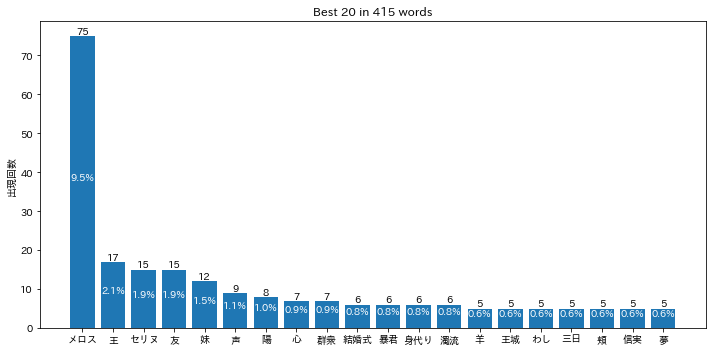

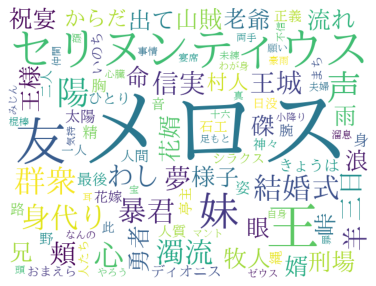

In [20]:
t2w = Txt2wordcloud()
words = t2w.re_def('target.txt')
count_dic = t2w.counting(words)
t2w.plot(count_dic)
t2w.wordcloud(count_dic)